In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize 

In [2]:
eps = 0.001

f_calc = 0

def func1(x):
    global f_calc
    f_calc += 1
    return x ** 3

def func2(x):
    global f_calc
    f_calc += 1
    return abs(x - 0.2)

def func3(x):
    global f_calc
    f_calc += 1
    return x * math.sin(1 / x)

# Part 1

In [3]:
def exhaustive_search(f, a, b, eps=0.001):
    n = math.ceil((b - a) / eps)
    x_star = f_star = float("inf")
    for k in range(n + 1):
        x = a + k * (b - a) / n
        f_x = f(x)
        if f_x < f_star:
            x_star, f_star = x, f_x
    return x_star, n + 1

In [4]:
def dichotomy(f, a, b, delta=0.0001, eps=0.001):
    num_iterations = 0
    while abs(a - b) > eps:
        x_1, x_2 = (a + b - delta) / 2, (a + b + delta) / 2
        if f(x_1) <= f(x_2):
            a, b = a, x_2
        else:
            a, b = x_1, b
        num_iterations += 1
    x_star = (a + b) / 2
    return x_star, num_iterations

In [5]:
def golden_section_search(f, a, b, eps=0.001):
    t = (3 - math.sqrt(5)) / 2
    x_1 = a + t * (b - a)
    x_2 = b - t * (b - a)
    f_1, f_2 = f(x_1), f(x_2)
    num_iterations = 0
    while abs(a - b) > eps:
        if f_1 <= f_2:
            a, b, x_2, f_2 = a, x_2, x_1, f_1
            x_1 = a + t * (b - a)
            f_1 = f(x_1)
        else:
            a, b, x_1, f_1 = x_1, b, x_2, f_2
            x_2 = b - t * (b - a)
            f_2 = f(x_2)
        num_iterations += 1
    x_star = (a + b) / 2
    return x_star, num_iterations

## Exhaustive search method

$f(x) = x^3, \ x \in [0, 1]$

In [6]:
f_calc = 0
x_m, num_iters = exhaustive_search(func1, 0, 1)
print("Exhaustive search result:")
print(f"x = {x_m}, f(x) = {func1(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Exhaustive search result:
x = 0.0, f(x) = 0.0
Number of iterations: 1001
Number of f-calculations: 1001


$f(x) = |x - 0.2|, \ x \in [0, 1]$

In [7]:
f_calc = 0
x_m, num_iters = exhaustive_search(func2, 0, 1)
print("Exhaustive search result:")
print(f"x = {x_m}, f(x) = {func2(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Exhaustive search result:
x = 0.2, f(x) = 0.0
Number of iterations: 1001
Number of f-calculations: 1001


$f(x) = x \sin{\frac{1}{x}}, \ x \in [0.01, 1]$

In [8]:
f_calc = 0
x_m, num_iters = exhaustive_search(func3, 0.01, 1)
print("Exhaustive search result:")
print(f"x = {x_m}, f(x) = {func3(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Exhaustive search result:
x = 0.223, f(x) = -0.21722461258083445
Number of iterations: 991
Number of f-calculations: 991


## Dichotomy method

$f(x) = x^3, \ x \in [0, 1]$

In [9]:
f_calc = 0
x_m, num_iters = dichotomy(func1, 0, 1)
print("Dichotomy method result:")
print(f"x = {x_m}, f(x) = {func1(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Dichotomy method result:
x = 0.00029411621093749997, f(x) = 2.5442330338744787e-11
Number of iterations: 11
Number of f-calculations: 22


$f(x) = |x - 0.2|, \ x \in [0, 1]$

In [10]:
f_calc = 0
x_m, num_iters = dichotomy(func2, 0, 1)
print("Dichotomy method result:")
print(f"x = {x_m}, f(x) = {func2(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Dichotomy method result:
x = 0.19998117675781252, f(x) = 1.8823242187493427e-05
Number of iterations: 11
Number of f-calculations: 22


$f(x) = x \sin{\frac{1}{x}}, \ x \in [0.01, 1]$

In [11]:
f_calc = 0
x_m, num_iters = dichotomy(func3, 0.01, 1)
print("Dichotomy method result:")
print(f"x = {x_m}, f(x) = {func3(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Dichotomy method result:
x = 0.22248215332031251, f(x) = -0.21723343522421576
Number of iterations: 11
Number of f-calculations: 22


## Golden section method

$f(x) = x^3, \ x \in [0, 1]$

In [12]:
f_calc = 0
x_m, num_iters = golden_section_search(func1, 0, 1)
print("Golden section method result:")
print(f"x = {x_m}, f(x) = {func1(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Golden section method result:
x = 0.000366568717928702, f(x) = 4.9256800857728296e-11
Number of iterations: 15
Number of f-calculations: 17


$f(x) = |x - 0.2|, \ x \in [0, 1]$

In [13]:
f_calc = 0
x_m, num_iters = golden_section_search(func2, 0, 1)
print("Golden section method result:")
print(f"x = {x_m}, f(x) = {func2(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Golden section method result:
x = 0.2000733137435857, f(x) = 7.331374358568454e-05
Number of iterations: 15
Number of f-calculations: 17


$f(x) = x \sin{\frac{1}{x}}, \ x \in [0.01, 1]$

In [14]:
f_calc = 0
x_m, num_iters = golden_section_search(func3, 0.01, 1)
print("Golden section method result:")
print(f"x = {x_m}, f(x) = {func3(x_m)}")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc - 1}")

Golden section method result:
x = 0.22271959361960325, f(x) = -0.21723232817753246
Number of iterations: 15
Number of f-calculations: 17


# Part 2

In [15]:
alpha, beta = np.random.uniform(), np.random.uniform()
print(f"alpha = {alpha}")
print(f"beta = {beta}")

alpha = 0.4591910887680559
beta = 0.0379706926337019


In [16]:
n = 100
xs = [k / n for k in range(n + 1)]
ys = [alpha * x + beta + np.random.randn() for x in xs]

In [17]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

def D(x, f):
    global f_calc
    f_calc += 1
    a, b = x
    return sum((f(x, a, b) - y) ** 2 for x, y in zip(xs, ys))

In [18]:
def exhaustive_search2d(f, rranges, args=(), eps=0.001):
    (a_1, b_1), (a_2, b_2) = rranges
    n_1 = math.ceil(math.sqrt(2) * (b_1 - a_1) / eps)
    n_2 = math.ceil(math.sqrt(2) * (b_2 - a_2) / eps)
    x_star = f_star = float("inf")
    for k_1 in range(n_1 + 1):
        x_1 = a_1 + k_1 * (b_1 - a_1) / n_1
        for k_2 in range(n_2 + 1):
            x_2 = a_2 + k_2 * (b_2 - a_2) / n_2
            f_x = f((x_1, x_2), *args)
            if f_x < f_star:
                x_star, f_star = (x_1, x_2), f_x
    return x_star, (n_1 + 1) * (n_2 + 1)

def gauss_method(x0, approximant):
    a_prev = b_prev = float("inf")
    a, b = x0
    num_iters = 0
    n = math.ceil(1 / eps)
    while math.sqrt((a - a_prev) ** 2 + (b - b_prev) ** 2) > eps:
        a_prev, b_prev = a, b
        
        objective = lambda x: D((x, b), f=approximant)
        a = float(dichotomy(objective, a=0, b=1)[0])
        
        objective = lambda x: D((a, x), f=approximant)
        b = float(dichotomy(objective, a=0, b=1)[0])
        
        num_iters += 1
    return (a, b), num_iters

## Linear approximant

In [19]:
f_calc = 0

rranges = ((0, 1), (0, 1))
result, num_iterations = exhaustive_search2d(D, rranges, args=(linear,))
a_brute, b_brute = map(float, result)

print("Exhaustive search result:")
print(a_brute, b_brute, "\n")
print(f"Number of iterations: {num_iterations}")
print(f"Number of f-calculations: {f_calc}")

Exhaustive search result:
0.06431095406360424 0.32932862190812723 

Number of iterations: 2005056
Number of f-calculations: 2005056


In [33]:
f_calc = 0

result = optimize.minimize(D, (0, 0), args=(linear,), method='Nelder-Mead', tol=eps)
a_nelder_mead, b_nelder_mead = map(float, result.x)

print("Nelder-Mead method result:")
print(a_nelder_mead, b_nelder_mead, "\n")
print(f"Number of iterations: {result.nit}")
print(f"Number of f-calculations: {f_calc}")

Nelder-Mead method result:
0.06216022958606489 0.33085297811776426 

Number of iterations: 27
Number of f-calculations: 53


In [21]:
f_calc = 0

result, num_iters = gauss_method((0, 0), linear)
a_gauss, b_gauss = map(float, result)

print("Gauss method result:")
print(a_gauss, b_gauss, "\n")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc}")

Gauss method result:
0.06718195800781249 0.32789807128906245 

Number of iterations: 19
Number of f-calculations: 836


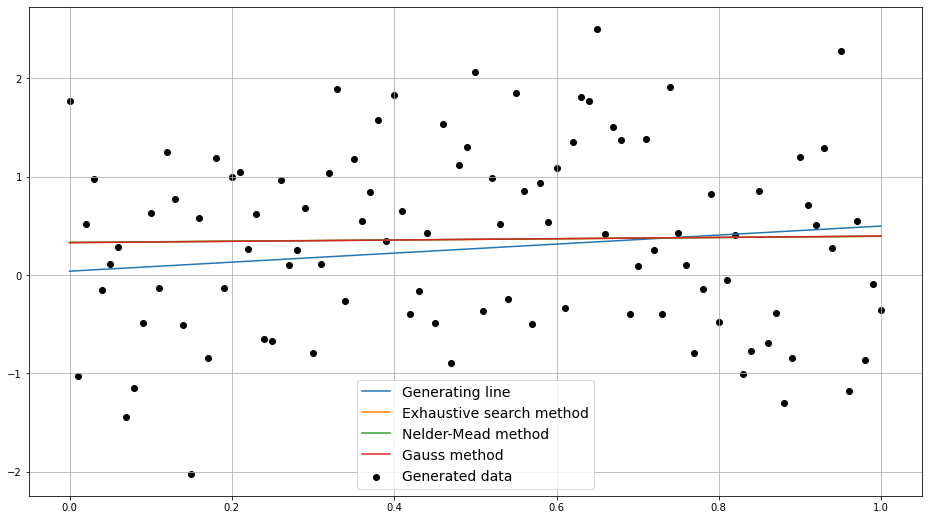

In [22]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.scatter(xs, ys, color="black")
plt.plot(xs, [alpha * x + beta for x in xs])
plt.plot(xs, [linear(x, a_brute, b_brute) for x in xs])
plt.plot(xs, [linear(x, a_nelder_mead, b_nelder_mead) for x in xs])
plt.plot(xs, [linear(x, a_gauss, b_gauss) for x in xs])
plt.legend(["Generating line", "Exhaustive search method", "Nelder-Mead method", "Gauss method", "Generated data"],
           fontsize=14)

## Rational approximant

In [23]:
f_calc = 0

rranges = ((0, 1), (0, 1))
result, num_iterations = exhaustive_search2d(D, rranges, args=(rational,))
a_brute, b_brute = map(float, result)

print("Exhaustive search result:")
print(a_brute, b_brute, "\n")
print(f"Number of iterations: {num_iterations}")
print(f"Number of f-calculations: {f_calc}")

Exhaustive search result:
0.36113074204947 0.0 

Number of iterations: 2005056
Number of f-calculations: 2005056


In [24]:
f_calc = 0

result = optimize.minimize(D, (0, 0), args=(rational,), method='Nelder-Mead', tol=eps)
a_nelder_mead, b_nelder_mead = map(float, result.x)

print("Nelder-Mead method result:")
print(a_nelder_mead, b_nelder_mead, "\n")
print(f"Number of iterations: {result.nit}")
print(f"Number of f-calculations: {f_calc}")

Nelder-Mead method result:
0.34780285721798915 -0.07549709668431273 

Number of iterations: 51
Number of f-calculations: 99


In [25]:
f_calc = 0

result, num_iters = gauss_method((0, 0), rational)
a_gauss, b_gauss = map(float, result)

print("Gauss method result:")
print(a_gauss, b_gauss, "\n")
print(f"Number of iterations: {num_iters}")
print(f"Number of f-calculations: {f_calc}")

Gauss method result:
0.36158610839843747 0.00029411621093749997 

Number of iterations: 2
Number of f-calculations: 88


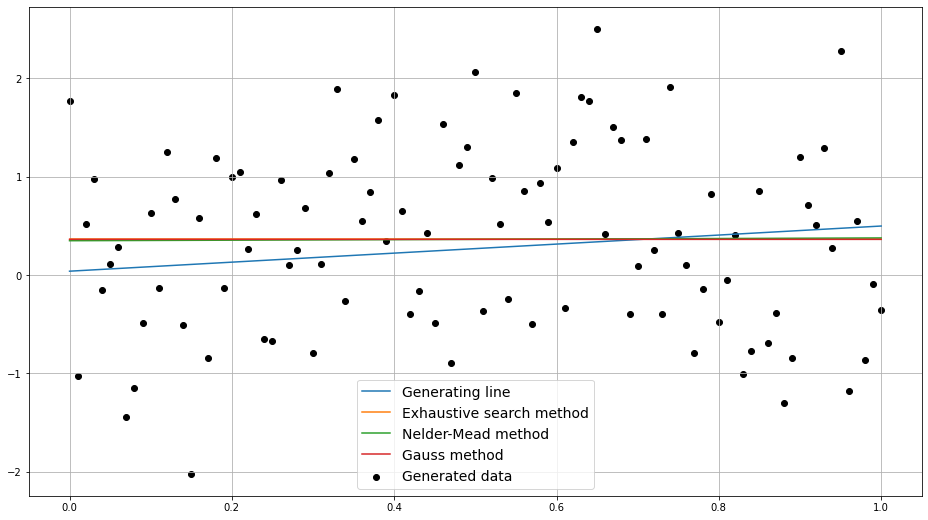

In [26]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.scatter(xs, ys, color="black")
plt.plot(xs, [alpha * x + beta for x in xs])
plt.plot(xs, [rational(x, a_brute, b_brute) for x in xs])
plt.plot(xs, [rational(x, a_nelder_mead, b_nelder_mead) for x in xs])
plt.plot(xs, [rational(x, a_gauss, b_gauss) for x in xs])
plt.legend(["Generating line", "Exhaustive search method", "Nelder-Mead method", "Gauss method", "Generated data"],
           fontsize=14)